In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
#from pandas.plotting import table
%matplotlib inline
sns.set(style='whitegrid', color_codes = True)

In [3]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

In [141]:
#ps.head()

In [4]:
ps = ps[["Date", "User", "Post patch?", "Post patch pipette R", "Nucleus sucked in?", "Notes", "Internal version", "PCR cycles", "SM_QC_PF", "Resolution index", "Bad dates"]]
#ps.dropna(subset = ["SM_QC_PF", "Post patch?"], inplace = True)
ps.dropna(subset = ["Post patch?"], inplace = True)
ps["User"] = ps["User"].astype("category")
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps = ps[ps["Bad dates"] != 'x']
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["PCR cycles"] == 21]
ps = ps.drop('Bad dates', 1)
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
#ps["PCR cycles"].value_counts()
ps

,Date,User,Post patch?,Post patch pipette R,Nucleus sucked in?,Notes,Internal version,PCR cycles,SM_QC_PF,Resolution index
4968,2017-04-19,P2,Outside-Out,NaN,NaN,NaN,AiV2,21.0,fail,NaN
4969,2017-04-19,P2,Outside-Out,NaN,NaN,NaN,AiV2,21.0,pass,0.923406
4970,2017-04-19,P2,No-Seal,NaN,NaN,NaN,AiV2,21.0,fail,NaN
4971,2017-04-19,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.000000
4972,2017-04-19,P2,Outside-Out,NaN,NaN,NaN,AiV2,21.0,pass,0.322631
4973,2017-04-19,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.322631
4974,2017-04-19,P2,No-Seal,NaN,NaN,NaN,AiV2,21.0,pass,0.000000
4975,2017-04-19,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,NaN
4978,2017-04-19,P6,No-Seal,NaN,NaN,NaN,AiV2,21.0,fail,NaN
4979,2017-04-19,P6,No-Seal,NaN,NaN,NaN,AiV2,21.0,pass,0.000000


#### defining counting functions

In [5]:
def get_count(x):    
    count = x["Post patch?"].count()
    return count

def calc_pct(part,total):
    pct = float(get_count(part)) / get_count(total)
    return pct

#### defining filtering functions

In [6]:
#input is a dataframe

def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def pass_only(df):
    pas = df[df["SM_QC_PF"] == "pass"]
    return pas

def gen_filter(df, col, cond):
    filtr = df[df[col] == cond]
    return filtr


In [7]:
#total = ps["Post patch?"].count()
total = get_count(ps)
total
ps['Post patch?'].value_counts()

Nucleated             755
No-Seal               556
Partial-Nucleus       204
nucleus_present       133
nucleus_absent        102
Outside-Out            92
Entire-Cell            17
entire_cell             6
no_nucleus_visible      6
nucleus_visible         4
missing                 1
Outside-Out?            0
Nucleus                 0
outside-out             0
Outside-out             0
no -seal                0
no-seal                 0
nr                      0
nucelated               0
Entire cell             0
Name: Post patch?, dtype: int64

# Post patch condition percentages

#### Filtering to nucleated patches only and calculating percentage

In [8]:
#nuc = ps[(ps["Post patch?"] == "Nucleated") | (ps["Post patch?"] == "Partial-Nucleus") | (ps["Post patch?"] == "nucleus_present") | (ps["Post patch?"] == "nucleus_visible")]
#nuc = ps[(ps["Post patch?"] == "Nucleated") | (((ps["Post patch?"] == "nucleus_visible") | (ps["Post patch?"] == "nucleus_present")) & (ps["Post patch pipette R"] >= 500))]
nuc = nucleated(ps)
nuc
nuc["post patch class"] = "Nucleated"
nuc
#nuc["Post patch pipette R"].value_counts()
#dic = {'Nucleated': 'test',
    #  'nucelated': 'Nucleated'
    # }

#ps['Post patch?'] = ps['Post patch?'].map(lambda x: dic[x])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,User,Post patch?,Post patch pipette R,Nucleus sucked in?,Notes,Internal version,PCR cycles,SM_QC_PF,Resolution index,post patch class
4971,2017-04-19,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.000000,Nucleated
4973,2017-04-19,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.322631,Nucleated
4975,2017-04-19,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,NaN,Nucleated
4988,2017-04-20,P1,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.601033,Nucleated
4997,2017-04-20,P1,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,NaN,Nucleated
5009,2017-04-20,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.678447,Nucleated
5022,2017-04-21,P1,Nucleated,NaN,NaN,"Fluorescence in Pipette,Cell Dimmed",AiV2,21.0,pass,0.795757,Nucleated
5026,2017-04-21,P2,Nucleated,NaN,NaN,Fluorescence in Pipette,AiV2,21.0,pass,1.000000,Nucleated
5027,2017-04-21,P2,Nucleated,NaN,NaN,Fluorescence in Pipette,AiV2,21.0,pass,0.877682,Nucleated
5035,2017-04-21,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.556320,Nucleated


In [9]:
#nuc_count = nuc["Post patch?"].count()
nuc_count = get_count(nuc)
nuc_count

859

In [10]:
#nuc_percent = float(nuc_count)/total
#nuc_percent
nuc_pct = calc_pct(nuc, ps) 
print "nucleated patch %:", nuc_pct

nucleated patch %: 0.4578891258


#### Filtering to partial-nucleated patches only and calculating percentage 

In [11]:
part_nuc = partial_nucleated(ps)
part_nuc["post patch class"] = "Partial nucleated"
part_nuc
#part_nuc["Post patch pipette R"].value_counts()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,User,Post patch?,Post patch pipette R,Nucleus sucked in?,Notes,Internal version,PCR cycles,SM_QC_PF,Resolution index,post patch class
4996,2017-04-20,P1,Partial-Nucleus,NaN,NaN,NaN,AiV2,21.0,pass,0.678447,Partial nucleated
5021,2017-04-21,P1,Partial-Nucleus,NaN,NaN,"Fluorescence in Pipette,Cell Dimmed",AiV2,21.0,pass,1.000000,Partial nucleated
5047,2017-04-24,P1,Partial-Nucleus,NaN,NaN,Cell Dimmed lots of small bubbles,AiV2,21.0,fail,NaN,Partial nucleated
5135,2017-04-27,P1,Partial-Nucleus,NaN,NaN,Fluorescence in Pipette lots of small bubbles,AiV2,21.0,fail,NaN,Partial nucleated
5169,2017-04-28,P2,Partial-Nucleus,NaN,NaN,one tiny bubble formed during expulsion.,AiV2,21.0,pass,1.000000,Partial nucleated
5171,2017-04-28,P2,Partial-Nucleus,NaN,NaN,no bubbles during expulsion.,AiV2,21.0,pass,1.000000,Partial nucleated
5188,2017-05-01,P2,Partial-Nucleus,NaN,NaN,Fluorescence in Pipette One big bubble formed ...,AiV2,21.0,pass,NaN,Partial nucleated
5190,2017-05-01,P2,Partial-Nucleus,NaN,NaN,Fluorescence in Pipette,AiV2,21.0,pass,NaN,Partial nucleated
5202,2017-05-01,P6,Partial-Nucleus,NaN,NaN,NaN,AiV2,21.0,fail,NaN,Partial nucleated
5203,2017-05-01,P6,Partial-Nucleus,NaN,NaN,NaN,AiV2,21.0,fail,NaN,Partial nucleated


In [12]:
part_nuc_pct = calc_pct(part_nuc, ps)
print "partial nucleated patch %:", part_nuc_pct

partial nucleated patch %: 0.126332622601


#### Filtering to outside-out patches only and calculating percentage

In [13]:
out_out = outside_out(ps)
out_out["post patch class"] = "Outside out"
#out_out
out_out_pct = calc_pct(out_out, ps)
print "outside_out %: ", out_out_pct
#out_out["Post patch pipette R"].value_counts()
#out_out["Post patch?"].value_counts()

outside_out %:  0.0591684434968


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Filtering to no-seal patches only and calculating percentage

In [14]:
noSeal = no_seal(ps)
noSeal["post patch class"] = "No seal"
noSeal
noSeal_pct = calc_pct(noSeal, ps)
print "no seal %: ", noSeal_pct

no seal %:  0.34328358209


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Filtering to entire cell patches only and claculating percentage

In [15]:
entirecell = ps[ps["Post patch?"] == "Entire-Cell"]
entirecell['post patch class'] = "Entire cell"
#entirecell["Post patch?"].value_counts()
#entirecell

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
frames = [nuc, part_nuc, out_out, noSeal, entirecell]
result = pd.concat(frames)
result

,Date,User,Post patch?,Post patch pipette R,Nucleus sucked in?,Notes,Internal version,PCR cycles,SM_QC_PF,Resolution index,post patch class
4971,2017-04-19,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.000000,Nucleated
4973,2017-04-19,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.322631,Nucleated
4975,2017-04-19,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,NaN,Nucleated
4988,2017-04-20,P1,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.601033,Nucleated
4997,2017-04-20,P1,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,NaN,Nucleated
5009,2017-04-20,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.678447,Nucleated
5022,2017-04-21,P1,Nucleated,NaN,NaN,"Fluorescence in Pipette,Cell Dimmed",AiV2,21.0,pass,0.795757,Nucleated
5026,2017-04-21,P2,Nucleated,NaN,NaN,Fluorescence in Pipette,AiV2,21.0,pass,1.000000,Nucleated
5027,2017-04-21,P2,Nucleated,NaN,NaN,Fluorescence in Pipette,AiV2,21.0,pass,0.877682,Nucleated
5035,2017-04-21,P2,Nucleated,NaN,NaN,NaN,AiV2,21.0,pass,0.556320,Nucleated


# Calculating nucleated patch percentages by user

In [17]:
P8_total = ps[ps["User"] == 'P8']
P8_total_count = P8_total['Post patch?'].count()
P8_total_count

472

In [18]:
#use post patch nucleated filter
P8_nuc = P8_total[P8_total['Post patch?'] == 'Nucleated']
P8_nuc_count = P8_nuc['Post patch?'].count()
P8_nuc_count

211

In [19]:
float(P8_nuc_count)/P8_total_count

0.4470338983050847

In [20]:
for riguser in ['P1','P2','P6','P8','P9','PA','PB']:
    user_total = ps[ps['User'] == riguser]
    user_nuc = nucleated(user_total)
    user_percent = calc_pct(user_nuc, user_total)
    print riguser,': ', user_percent
    
    #user_total_count = get_count(user_total)
    #user_total_count = user_total['Post patch?'].count()
    #user_nuc = user_total[user_total['Post patch?'] == 'Nucleated']
    #user_nuc_count = get_count(user_nuc)
    #user_nuc_count = user_nuc['Post patch?'].count()
    #user_percent = float(user_nuc_count)/(user_total_count)

P1 :  0.342490842491
P2 :  0.506086956522
P6 :  0.369863013699
P8 :  0.514830508475
P9 :  0.628865979381
PA :  0.477272727273
PB :  0.410714285714


# Obtaining nucleus dependant on internal solution version

In [126]:
standard = "AiV2"
alexa = "AiV2-50uM alexa 488"
post_patch_condition = ['Nucleated', 'Partial nucleated', 'Outside out', 'No seal']
def postpatch_results(internal, postpatch):
    internal_version = gen_filter(result, "Internal version", internal)
    internal_version = internal_version[(internal_version["User"] == "P2") | (internal_version["User"] == "P8")]
    #for n in internal_version["post patch class"]:
    #for n in post_patch_condition:
    post_patch = gen_filter(internal_version, 'post patch class', postpatch)
    post_patch_pct = calc_pct(post_patch, internal_version)
    return post_patch_pct
    #print internal, n,': ', post_patch_pct
sn = postpatch_results(standard, "Nucleated")
sn_label = "Standard Nucleated" 
an = postpatch_results(alexa, "Nucleated")
an_label = "Alexa Nucleated"
spn = postpatch_results(standard, "Partial nucleated")
spn_label = "Standard Partial Nucleated"
print sn_label, sn    
print an_label, an
print spn_label, spn
#std = postpatch_results(standard)
#alexa488 = postpatch_results(alexa)
#std
#alexa488

Standard Nucleated 0.512516469038
Alexa Nucleated 0.510563380282
Standard Partial Nucleated 0.123847167325


# Rate of SMQC pass by internal solution verion

In [21]:
std_int = gen_filter(ps, "Internal version", "AiV2")
#std_int = ps[ps["Internal version"] == "AiV2"]
std_int.dropna(subset = ["SM_QC_PF", "Post patch?"], inplace = True)
std_int = std_int[(std_int["User"] == "P2") | (std_int["User"] == "P8")]
standard_internal_count = std_int["Post patch?"].count()
standard_internal_count

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


758

In [22]:
standard_internal_pass = std_int[std_int["SM_QC_PF"] == "pass"]
standard_internal_pass
standard_internal_pass_count = standard_internal_pass["Post patch?"].count()
standard_internal_pass_count                                    

661

In [23]:
print "Standard internal pass rate:" , float(standard_internal_pass_count)/standard_internal_count

Standard internal pass rate: 0.872031662269


In [24]:
alexa_int.dropna(subset = ["SM_QC_PF", "Post patch?"], inplace = True)
alexa_internal_count = alexa_int["Post patch?"].count()
alexa_internal_count

NameError: name 'alexa_int' is not defined

In [ ]:
alexa_internal_pass = alexa_int[alexa_int["SM_QC_PF"] == "pass"]
alexa_internal_pass_count = alexa_internal_pass["Post patch?"].count()
alexa_internal_pass_count

In [452]:
print "Alexa internal pass rate:" , float(alexa_internal_pass_count)/alexa_internal_count

Alexa internal pass rate: 0.797872340426


# Rate of SM_QC pass based on internal version and post patch condition

In [16]:
result["post patch class"].value_counts()

Nucleated            859
No seal              644
Partial nucleated    237
Outside out          111
Entire cell           17
Name: post patch class, dtype: int64

In [128]:
alexa = result[result["Internal version"] == "AiV2-50uM alexa 488"]
alexa["Internal version"].value_counts()
alexa = alexa[(alexa["User"] == "P2") | (alexa["User"] == "P8")]
alexa_count = get_count(alexa)
#alexa_count = alexa["post patch class"].count()
print alexa_count
alexa_pass = pass_only(alexa_internal)
alexa_pass_count = alexa_pass["Post patch?"].count()
print alexa_pass_count
alexa_nuc = nucleated(alexa)
alexa_nuc_count = get_count(alexa_nuc)
print alexa_nuc_count
alexa_nuc_pass = pass_only(alexa_nuc)
alexa_nuc_pass_count = get_count(alexa_nuc_pass)
alexa_nuc_pass_count

284


NameError: name 'alexa_internal' is not defined

In [21]:
result.dropna(subset = ["SM_QC_PF"], inplace=True)
result = result[result["SM_QC_PF"] != 'na']
print result["SM_QC_PF"].value_counts()
print result["post patch class"].value_counts()

pass            1388
fail             394
smarter_fail       0
na                 0
cnt                0
Name: SM_QC_PF, dtype: int64
Nucleated            823
No seal              611
Partial nucleated    223
Outside out          108
Entire cell           17
Name: post patch class, dtype: int64


In [22]:
#result.dropna(subset = ["SM_QC_PF"], inplace=True)
result1 = result[(result["User"] == "P2") | (result["User"] == "P8")]
result1 = result1.drop('Date',1)
result1 = result1.drop('User',1)
result1 = result1.drop('Post patch?',1)
result1 = result1.drop('Post patch pipette R',1)
result1 = result1.drop('Nucleus sucked in?',1)
result1 = result1.drop('Notes',1)
result1 = result1.drop('PCR cycles',1)
result1 = result1.drop('Resolution index',1)
int_pp = result1.groupby(["Internal version", "post patch class"]).count()
int_pp = int_pp.reset_index()
int_pp
#type(int_pp)
#result1["SM_QC_PF"].value_counts()

,Internal version,post patch class,SM_QC_PF
0,AiV2,Entire cell,6
1,AiV2,No seal,240
2,AiV2,Nucleated,381
3,AiV2,Outside out,28
4,AiV2,Partial nucleated,94
5,AiV2-50uM alexa 488,Entire cell,1
6,AiV2-50uM alexa 488,No seal,76
7,AiV2-50uM alexa 488,Nucleated,132
8,AiV2-50uM alexa 488,Outside out,13
9,AiV2-50uM alexa 488,Partial nucleated,24


In [23]:
int_pp_pass = pass_only(result1)
int_pp_pass["SM_QC_PF"].value_counts()
int_pp_pass = int_pp_pass.groupby(["Internal version", "post patch class"]).count()
int_pp_pass = int_pp_pass.reset_index()
int_pp_pass

,Internal version,post patch class,SM_QC_PF
0,AiV2,Entire cell,5
1,AiV2,No seal,193
2,AiV2,Nucleated,356
3,AiV2,Outside out,22
4,AiV2,Partial nucleated,85
5,AiV2-50uM alexa 488,Entire cell,1
6,AiV2-50uM alexa 488,No seal,35
7,AiV2-50uM alexa 488,Nucleated,127
8,AiV2-50uM alexa 488,Outside out,5
9,AiV2-50uM alexa 488,Partial nucleated,19


In [24]:
int_pp_totals = int_pp.groupby(["Internal version", "post patch class"]).agg({"SM_QC_PF": "sum"})
int_pp_pass_totals = int_pp_pass.groupby(["Internal version", "post patch class"]).agg({"SM_QC_PF": "sum"})
int_pp_pass_pct = int_pp_pass_totals.div(int_pp_totals, level='Internal version') * 100
int_pp_pass_pct = int_pp_pass_pct.reset_index()
int_pp_pass_pct = int_pp_pass_pct.rename(columns = {'post patch class': 'Post patch outcome', 'SM_QC_PF': 'SM_QC pass percentage'})
int_pp_pass_pct
#std_pp_pass_pct = int_pp_pass_pct[int_pp_pass_pct["Internal version"] == "AiV2"]
#alexa_pp_pass_pct = int_pp_pass_pct[int_pp_pass_pct["Internal version"] == "AiV2-50uM alexa 488"]

,Internal version,Post patch outcome,SM_QC pass percentage
0,AiV2,Entire cell,83.333333
1,AiV2,No seal,80.416667
2,AiV2,Nucleated,93.438320
3,AiV2,Outside out,78.571429
4,AiV2,Partial nucleated,90.425532
5,AiV2-50uM alexa 488,Entire cell,100.000000
6,AiV2-50uM alexa 488,No seal,46.052632
7,AiV2-50uM alexa 488,Nucleated,96.212121
8,AiV2-50uM alexa 488,Outside out,38.461538
9,AiV2-50uM alexa 488,Partial nucleated,79.166667


In [27]:
ax = plt.bar(x = 'Post patch outcome', y = 'SM_QC pass percentage', hue='Internal version',  data=int_pp_pass_pct)   
ax.set(ylabel = 'SM_QC pass %')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.height()))


plt.legend(loc = 'upper right')
plt.title('Smarter QC Pass % vs Post Patch Outcome')
#plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.savefig('SM_QC_pass_vs_postpatch_by_internal_version.png', dpi=300)
#for item in internal_postpatch_passpct.get_xticklables():
    #item.set_rotation(90)

TypeError: bar() takes at least 2 arguments (1 given)

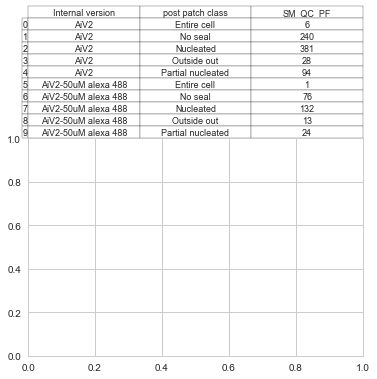

In [55]:
plt.table(cellText = int_pp_summary.values,
         rowLabels=int_pp_summary.index,
         colLabels=int_pp_summary.columns,
         cellLoc='center', rowLoc='center',loc='top')

In [160]:
print result["SM_QC_PF"].value_counts()
print result["Internal version"].value_counts()

pass            1388
fail             394
smarter_fail       0
na                 0
cnt                0
Name: SM_QC_PF, dtype: int64
AiV2                   1367
AiV2-50uM alexa 488     409
Name: Internal version, dtype: int64


In [161]:
result.dropna(subset = ["SM_QC_PF"], inplace=True)
result = result[result["SM_QC_PF"] != 'na']
standard = "AiV2"
alexa = "AiV2-50uM alexa 488"
#post_patch_condition = ['Nucleated', "Partial nucleated", "Outside out", "No seal", "Entire cell"]
def pass_pct_results(internal, postpatch):
    int_ver = gen_filter(result, "Internal version", internal)
    #int_ver_count = int_ver["Post patch?"].count
    int_ver = int_ver[(int_ver["User"] == "P2") | (int_ver["User"] == "P8")]
    #for n in post_patch_condition:
    post_patch = gen_filter(int_ver,"post patch class", postpatch)
    post_patch_pass = pass_only(post_patch)
    post_patch_pass_count = get_count(post_patch_pass)
    post_patch_pass_pct = calc_pct(post_patch_pass, post_patch)
    #print internal, n,': ', post_patch_pass_pct
    return post_patch_pass_pct, post_patch_pass_count
    #if internal == standard:
#pass_pct_results(alexa)
#pass_pct_results(standard)
x1 = "Standard Nucleated"
y1 = pass_pct_results(standard, "Nucleated")
x2 = "Alexa Nucleated"
y2 = pass_pct_results(alexa, "Nucleated")
x3 = "Standard Partial Nucleated"
y3 = pass_pct_results(standard, "Partial nucleated")
x4 = "Alexa Partial Nucleated"
y4 = pass_pct_results(alexa, "Partial nucleated")
x5 = "Standard Outside Out"
y5 = pass_pct_results(standard, "Outside out")
x6 = "Alexa Outside Out"
y6 = pass_pct_results(alexa, "Outside out")

#std_lbl = (x1, x3)
#alx_lbl = (x2, x4)
#N = 2
#standard_postpatch = (y1, y3)
#alexa_postpatch = (y2, y4)
#ind = np.arange(N)
#width = 0.35

#fig, ax = plt.subplots()
#rects1 = ax.bar(ind, standard_postpatch, width, color = 'y')

print x1, y1
print x2, y2
print x3, y3
print x4, y4
print x5, y5
print x6, y6


Standard Nucleated (0.9343832020997376, 356)
Alexa Nucleated (0.9621212121212122, 127)
Standard Partial Nucleated (0.9042553191489362, 85)
Alexa Partial Nucleated (0.7916666666666666, 19)
Standard Outside Out (0.7857142857142857, 22)
Alexa Outside Out (0.38461538461538464, 5)


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


TypeError: 'AxesSubplot' object does not support indexing

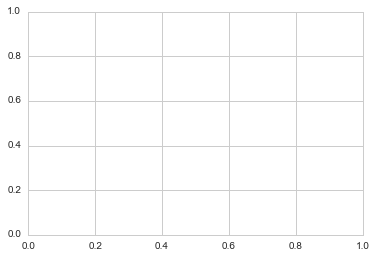

In [32]:
fig, axs = plt.subplots()
axs[0].bar(x1, y1)
#axs[1].scatter(x1, y1)
#axs[2].plot(x1, y1)

# Resolution Index vs post patch condition for pre and post alexa experiments

In [359]:
result.dropna(subset = ["Resolution index"], inplace=True)

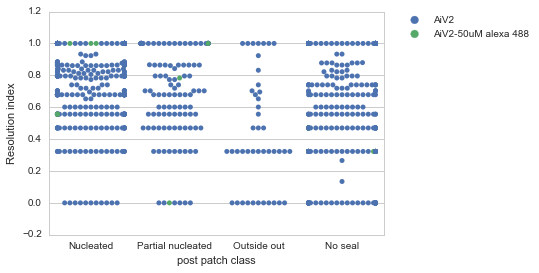

In [364]:
sns.swarmplot(x = "post patch class", y = "Resolution index", hue = "Internal version", data=result)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [362]:
result["Internal version"].value_counts()

AiV2                   1028
AiV2-50uM alexa 488      21
Name: Internal version, dtype: int64

In [369]:
post_alexa = gen_filter(result, 'Internal version', alexa)
post_alexa_count = get_count(post_alexa)
post_alexa_count

21

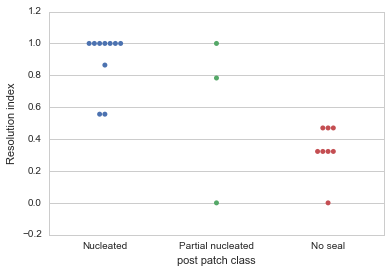

In [371]:
sns.swarmplot(x = "post patch class", y = "Resolution index", data=post_alexa)

In [372]:
pre_alexa = gen_filter(result, 'Internal version', standard)
pre_alexa_count = get_count(pre_alexa)
pre_alexa_count

1028

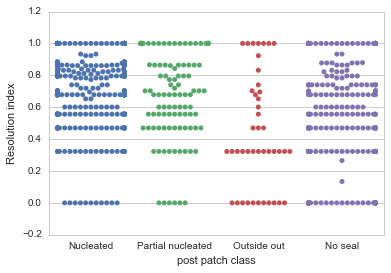

In [373]:
sns.swarmplot(x = "post patch class", y = "Resolution index", data=pre_alexa)